# Introduction
This notebook demonstrates the process of building a Convolutional Neural Network (CNN) using the Fastai library to predict car prices based on images. It covers data preparation, model training, evaluation, and saving the trained model for future use.


# Setup and Imports

In [ ]:
!pip install fastai

from fastai.vision.all import *
import pandas as pd
from pathlib import Path

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21

# Mount Google Drive
This section mounts Google Drive to access the dataset.

In [ ]:
# Mount Google Drive
from google.colab import drive
import pandas as pd
from pathlib import Path

drive.mount('/content/drive')


Mounted at /content/drive


# Prepare the Data
This section prepares the data by loading the dataset, extracting necessary columns, and adding full image paths.

In [ ]:
# Define the paths

cars_data_directory = '/content/drive/My Drive/cars_dataset/'
cars_data_file = Path(cars_data_directory) / 'final_dataset.csv'
cars_data_images = '/content/drive/My Drive/cars_photos/dataset_mono/images/'

df = pd.read_csv(cars_data_file)
df.head()

# Extract the filename and price columns
df = df[['filename', 'price']]

# Define a function to get the full image path
def get_image_path(image_name):
    return Path(cars_data_images) / image_name

# Add the full image path to the dataframe
df['full_image_path'] = df['filename'].apply(get_image_path)

new_df = df[['full_image_path', 'price']]

# Reset index of the new dataframe
new_df.reset_index(drop=True, inplace=True)

# Display the new dataframe
print("New dataframe with full image paths and prices:")
new_df



New dataframe with full image paths and prices:


,full_image_path,price
0,/content/drive/My Drive/cars_photos/dataset_mono/images/1.jpg,160.0
1,/content/drive/My Drive/cars_photos/dataset_mono/images/2.jpg,220.0
2,/content/drive/My Drive/cars_photos/dataset_mono/images/3.jpg,240.0
3,/content/drive/My Drive/cars_photos/dataset_mono/images/4.jpg,240.0
4,/content/drive/My Drive/cars_photos/dataset_mono/images/5.jpg,240.0
...,...,...
197,/content/drive/My Drive/cars_photos/dataset_mono/images/2150.jpg,215.0
198,/content/drive/My Drive/cars_photos/dataset_mono/images/2151.jpg,218.0
199,/content/drive/My Drive/cars_photos/dataset_mono/images/2152.jpg,240.0
200,/content/drive/My Drive/cars_photos/dataset_mono/images/2153.jpg,230.0


# Define the DataBlock
This section defines the DataBlock for loading images and corresponding price labels.

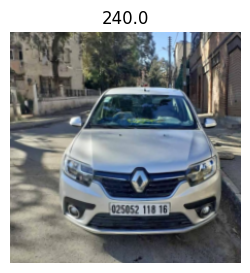

In [ ]:
from fastai.vision.all import *

# Define the DataBlock
car_block = DataBlock(
    blocks=(ImageBlock, RegressionBlock),
    get_x=ColReader('full_image_path'),
    get_y=ColReader('price'),
    splitter=RandomSplitter(valid_pct=0.2),
    item_tfms=Resize(224),
    batch_tfms=aug_transforms()
)

# Create the DataLoaders
dls = car_block.dataloaders(new_df)
dls.show_batch(max_n=1)

# Define and Train the Model
This section defines the CNN model, finds the optimal learning rate, fine-tunes the model for different epochs, and identifies the best number of epochs.

In [ ]:
# Define the Model
learn = cnn_learner(dls, resnet34, metrics=rmse)

/usr/local/lib/python3.10/dist-packages/fastai/vision/learner.py:301: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")


SuggestedLRs(valley=0.019054606556892395)

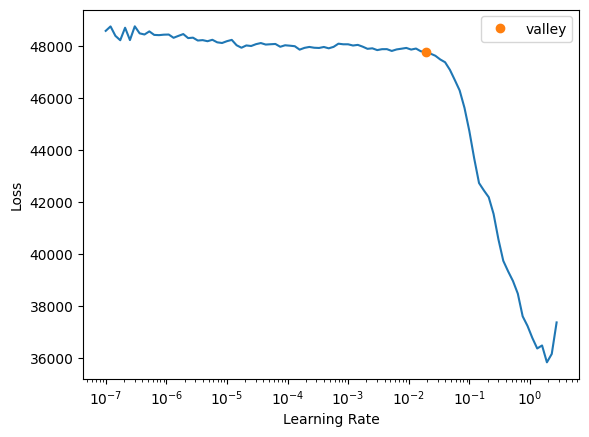

In [ ]:
# Finding the optimal learning rate
learn.lr_find()

In [ ]:
optimal_lr = 1e-2

# Fine-tune the model with different epochs and optimal learning rate
best_rmse = float('inf')
best_epochs = 0

for epochs in [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]:
    learn.fine_tune(epochs, base_lr=optimal_lr)
    preds, targs = learn.get_preds()
    rmse_value = rmse(preds, targs).item()
    print(f"Epochs: {epochs}, RMSE: {rmse_value:.4f}")
    if rmse_value < best_rmse:
        best_rmse = rmse_value
        best_epochs = epochs

print(f"Best number of epochs: {best_epochs}, with RMSE: {best_rmse:.4f}")

epoch,train_loss,valid_loss,_rmse,time
0,329.779602,620.750916,24.914871,00:04


epoch,train_loss,valid_loss,_rmse,time
0,252.739517,703.970276,26.532438,00:04
1,337.236328,644.713684,25.391212,00:03
2,327.282990,523.035034,22.869957,00:03
3,334.661591,599.057068,24.475641,00:03
4,339.898987,718.524475,26.805307,00:05
5,342.244324,824.715820,28.717863,00:03
6,337.732330,896.588257,29.943083,00:03
7,341.574371,921.361450,30.353937,00:05
8,335.186890,905.441895,30.090563,00:03
9,331.321777,891.921082,29.865047,00:03


Epochs: 10, RMSE: 29.8650


epoch,train_loss,valid_loss,_rmse,time
0,412.904053,710.710571,26.659155,00:03


epoch,train_loss,valid_loss,_rmse,time
0,265.485413,712.816345,26.698620,00:05
1,284.303192,678.785156,26.053505,00:03
2,312.577118,697.576843,26.411680,00:03
3,346.067352,764.831482,27.655588,00:04
4,349.228760,840.228638,28.986696,00:04
5,356.652405,1235.199341,35.145405,00:03
6,379.928314,1125.856323,33.553780,00:03
7,368.495972,836.380493,28.920244,00:04
8,390.519836,752.905212,27.439117,00:03
9,376.289398,985.436340,31.391659,00:03


Epochs: 20, RMSE: 24.1604


epoch,train_loss,valid_loss,_rmse,time
0,370.537933,575.407654,23.987656,00:03


epoch,train_loss,valid_loss,_rmse,time
0,242.604553,637.679688,25.252321,00:03
1,337.649567,630.648987,25.112726,00:05
2,329.948700,563.883606,23.746233,00:03
3,350.361084,571.232239,23.900465,00:03
4,342.655884,623.869568,24.977381,00:04
5,339.865234,764.474365,27.649130,00:04
6,340.236816,818.034363,28.601299,00:03
7,340.190430,1204.544067,34.706543,00:03
8,347.477020,1059.742432,32.553684,00:04
9,362.951660,738.687195,27.178801,00:03


Epochs: 30, RMSE: 26.9302


epoch,train_loss,valid_loss,_rmse,time
0,343.183624,806.502319,28.398985,00:04


epoch,train_loss,valid_loss,_rmse,time
0,277.865356,726.890320,26.960903,00:03
1,301.760468,683.224609,26.138565,00:03
2,295.532745,652.019714,25.534678,00:04
3,304.059448,623.700378,24.973993,00:04
4,327.736908,628.937500,25.078627,00:03
5,314.568329,658.191589,25.655243,00:03
6,306.809082,737.405090,27.155203,00:04
7,310.044434,779.264832,27.915316,00:03
8,317.033478,715.191711,26.743069,00:03
9,317.345551,573.643677,23.950859,00:03


Epochs: 40, RMSE: 22.7425


epoch,train_loss,valid_loss,_rmse,time
0,298.365814,586.339966,24.214458,00:03


epoch,train_loss,valid_loss,_rmse,time
0,311.317200,570.321167,23.881397,00:03
1,269.045410,580.287231,24.089151,00:03
2,269.761871,618.423157,24.868114,00:05
3,276.743988,666.213989,25.811121,00:03
4,269.126038,720.815857,26.848015,00:03
5,281.988342,693.336243,26.331276,00:03
6,281.758392,663.006042,25.748903,00:05
7,286.848938,642.385498,25.345325,00:03
8,285.791168,624.020630,24.980406,00:03
9,294.510803,609.773804,24.693598,00:04


Epochs: 50, RMSE: 24.0282


epoch,train_loss,valid_loss,_rmse,time
0,163.718018,587.219177,24.232605,00:04


epoch,train_loss,valid_loss,_rmse,time
0,356.261444,609.406128,24.686153,00:04
1,292.886444,627.305298,25.046064,00:03
2,297.161987,610.385742,24.705984,00:03
3,293.309509,574.603699,23.970892,00:04
4,281.603241,535.649841,23.144110,00:03
5,298.600372,515.691711,22.708845,00:06
6,289.925262,512.507202,22.638620,00:04
7,289.855103,510.486328,22.593945,00:03
8,291.028778,528.124695,22.980965,00:03
9,291.973755,560.862671,23.682539,00:03


Epochs: 60, RMSE: 21.1141


epoch,train_loss,valid_loss,_rmse,time
0,202.660751,453.286377,21.290522,00:04


epoch,train_loss,valid_loss,_rmse,time
0,251.634201,434.775055,20.851261,00:04
1,284.441559,446.275696,21.125238,00:03
2,292.742462,473.845886,21.768002,00:03
3,351.953491,495.971680,22.270422,00:05
4,364.797058,511.526367,22.616949,00:03
5,347.142548,523.476318,22.879604,00:03
6,325.639893,534.454773,23.118277,00:04
7,311.136597,550.861450,23.470436,00:05
8,297.386688,565.308716,23.776220,00:03
9,295.463928,571.036804,23.896376,00:03


Epochs: 70, RMSE: 23.7034


epoch,train_loss,valid_loss,_rmse,time
0,181.144547,588.087708,24.250519,00:03


epoch,train_loss,valid_loss,_rmse,time
0,239.564651,542.716187,23.296270,00:05
1,209.943405,536.043396,23.152609,00:03
2,223.716141,533.334229,23.094030,00:03
3,230.597214,540.215698,23.242538,00:04
4,219.176895,548.905579,23.428734,00:03
5,255.758835,535.337769,23.137367,00:03
6,253.719254,524.825195,22.909063,00:03
7,242.453018,511.609070,22.618776,00:05
8,240.761993,504.260254,22.455740,00:03
9,245.094574,517.217407,22.742414,00:03


Epochs: 80, RMSE: 23.8056


epoch,train_loss,valid_loss,_rmse,time
0,201.958267,606.951294,24.636381,00:03


epoch,train_loss,valid_loss,_rmse,time
0,201.156021,586.654297,24.220947,00:03
1,243.163010,579.437012,24.071497,00:04
2,243.147018,578.280457,24.047464,00:05
3,247.546921,583.722351,24.160347,00:03
4,256.276611,576.262207,24.005463,00:03
5,254.067780,572.448120,23.925886,00:04
6,240.953552,563.547119,23.739147,00:03
7,238.668930,554.143066,23.540243,00:03
8,235.222092,555.748962,23.574329,00:03
9,233.899490,550.482300,23.462360,00:05


Epochs: 90, RMSE: 24.6257


epoch,train_loss,valid_loss,_rmse,time
0,194.142685,627.575012,25.051447,00:05


epoch,train_loss,valid_loss,_rmse,time
0,139.686981,627.120117,25.042366,00:03
1,188.758133,635.533875,25.209797,00:03
2,180.486664,625.817383,25.016340,00:04
3,177.298615,618.213562,24.863901,00:04
4,173.427246,615.101562,24.801241,00:03
5,174.213913,613.948364,24.777981,00:03
6,184.047180,629.051880,25.080906,00:05
7,194.713974,643.907104,25.375324,00:03
8,207.807877,659.616028,25.682991,00:03
9,201.552734,653.914978,25.571762,00:04


Epochs: 100, RMSE: 25.2925
Best number of epochs: 60, with RMSE: 21.1141


In [ ]:
# Retrain the model with the best number of epochs
learn.fine_tune(best_epochs, base_lr=optimal_lr)

epoch,train_loss,valid_loss,_rmse,time
0,170.158188,622.234009,24.944618,00:04


epoch,train_loss,valid_loss,_rmse,time
0,216.426483,644.100281,25.379129,00:05
1,258.176300,705.641052,26.563906,00:03
2,244.152527,721.753601,26.865473,00:03
3,247.973709,710.713196,26.659204,00:05
4,241.690033,700.901611,26.474545,00:03
5,230.966644,680.103882,26.078802,00:03
6,233.850052,642.349304,25.344610,00:03
7,231.172134,612.202332,24.742723,00:05
8,220.279709,609.280396,24.683605,00:03
9,215.052216,614.839417,24.795954,00:05


# Evaluate the Model

Extract predictions and plot actual vs predicted prices.

In [ ]:
# Extract the predictions and actual values
preds, targs = learn.get_preds()
preds = preds.numpy().flatten()
targs = targs.numpy().flatten()

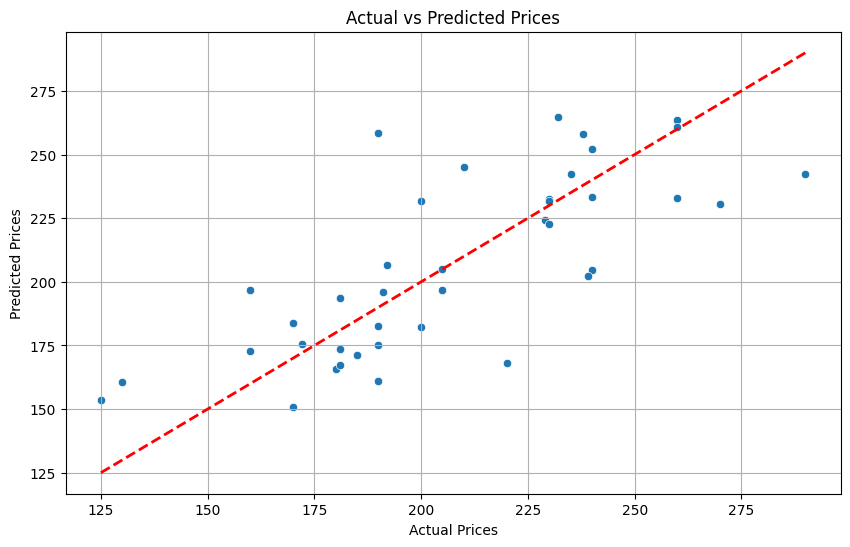

In [ ]:
# Plot actual vs predicted prices
plt.figure(figsize=(10, 6))
sns.scatterplot(x=targs, y=preds)
plt.plot([targs.min(), targs.max()], [targs.min(), targs.max()], 'r--', linewidth=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.grid(True)
plt.show()

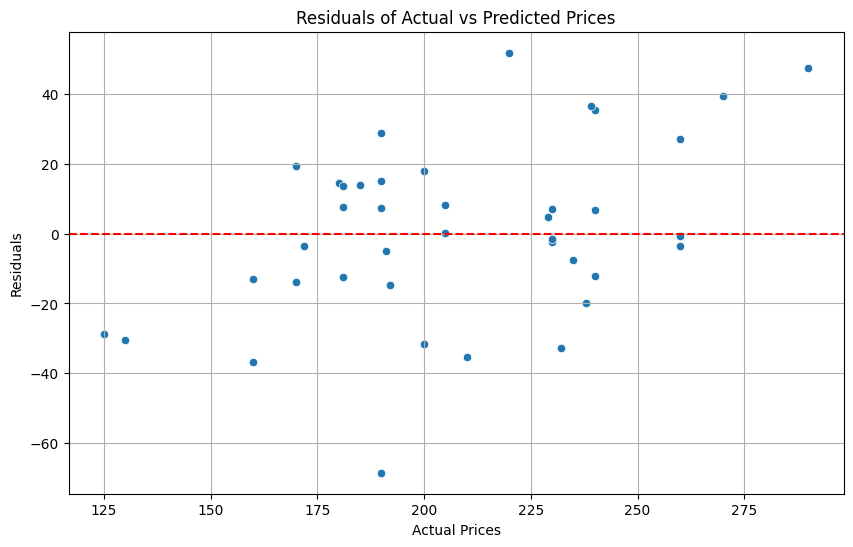

In [ ]:
import seaborn as sns

# Residuals Plot
residuals = targs - preds
plt.figure(figsize=(10, 6))
sns.scatterplot(x=targs, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Actual Prices')
plt.ylabel('Residuals')
plt.title('Residuals of Actual vs Predicted Prices')
plt.grid(True)
plt.show()

# Save the Model

Save the trained model to disk for later use.

In [ ]:
# Save the model
model_path = '/content/drive/My Drive/cars_model.pkl'
learn.export(model_path)

print(f"Model saved to {model_path}")

# Verify the saved model
learn_inf = load_learner(model_path)
print("Model loaded successfully.")

Model saved to /content/drive/My Drive/cars_model.pkl
Model loaded successfully.
